In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('Debernardi et al 2020 data.csv')

In [25]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


In [26]:
df.isna().sum()

sample_id                    0
patient_cohort               0
sample_origin                0
age                          0
sex                          0
diagnosis                    0
stage                      391
benign_sample_diagnosis    382
plasma_CA19_9              240
creatinine                   0
LYVE1                        0
REG1B                        0
TFF1                         0
REG1A                      284
dtype: int64

In [27]:
df.head()

,sample_id,patient_cohort,sample_origin,age,sex,diagnosis,stage,benign_sample_diagnosis,plasma_CA19_9,creatinine,LYVE1,REG1B,TFF1,REG1A
0,S1,Cohort1,BPTB,33,F,1,NaN,NaN,11.7,1.83222,0.893219,52.94884,654.282174,1262.000
1,S10,Cohort1,BPTB,81,F,1,NaN,NaN,NaN,0.97266,2.037585,94.46703,209.488250,228.407
2,S100,Cohort2,BPTB,51,M,1,NaN,NaN,7.0,0.78039,0.145589,102.36600,461.141000,NaN
3,S101,Cohort2,BPTB,61,M,1,NaN,NaN,8.0,0.70122,0.002805,60.57900,142.950000,NaN
4,S102,Cohort2,BPTB,62,M,1,NaN,NaN,9.0,0.21489,0.000860,65.54000,41.088000,NaN


# Handling NAN values

In [28]:
feature_na=[feature for feature in df.columns if df[feature].isnull().sum()>0]

In [29]:
del(df['stage'])
del(df['benign_sample_diagnosis'])
del(df['sample_id'])

In [30]:
 
df = df.interpolate()

In [31]:
df.isna().sum()

patient_cohort    0
sample_origin     0
age               0
sex               0
diagnosis         0
plasma_CA19_9     0
creatinine        0
LYVE1             0
REG1B             0
TFF1              0
REG1A             0
dtype: int64

In [32]:
df['sex'].value_counts()

F    299
M    291
Name: sex, dtype: int64

In [33]:
df['sex'] = df['sex'].map({'M': 1, 'F': 0})
df['sex'] = pd.to_numeric(df['sex'], errors='coerce')

In [34]:
df['sex'].value_counts()

0    299
1    291
Name: sex, dtype: int64

In [35]:
df['patient_cohort'] = df['patient_cohort'].map({'Cohort1': 1, 'Cohort2': 0})
df['patient_cohort'] = pd.to_numeric(df['patient_cohort'], errors='coerce')

In [36]:
df['patient_cohort'].value_counts()

1    332
0    258
Name: patient_cohort, dtype: int64

In [37]:
df['sample_origin'] = df['sample_origin'].map({'BPTB': 0, 'LIV': 1,'ESP': 2,'UCL': 3})
df['sample_origin'] = pd.to_numeric(df['sample_origin'], errors='coerce')

In [38]:
df["sample_origin"].value_counts()

0    409
1    132
2     29
3     20
Name: sample_origin, dtype: int64

In [39]:
target='diagnosis'
x = df.drop(target, axis=1)
y = df[target]

In [40]:
#Spliting dataset into training set and testing test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [41]:
# Feature selection
from sklearn.feature_selection import chi2
fscore = chi2(X_train, y_train) # to avoid overfitting by leaking the info to the model
fscore
pvalues = pd.Series(fscore[1])
pvalues.index = X_train.columns
pvalues
pvalues.sort_values(ascending=False)

creatinine         1.632496e-01
sex                7.594085e-02
patient_cohort     5.095998e-06
sample_origin      1.036463e-22
age                2.447569e-44
LYVE1             9.188756e-141
plasma_CA19_9      0.000000e+00
REG1B              0.000000e+00
TFF1               0.000000e+00
REG1A              0.000000e+00
dtype: float64

In [42]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=0, criterion="entropy")
dtc.fit(X_train, y_train)
pred_y = dtc.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_y)

0.7627118644067796

In [45]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test,pred_y)
print(confusion)

[[22  9  0]
 [ 8 33  3]
 [ 2  6 35]]


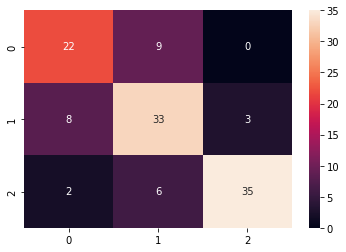

In [46]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred_y)
f = sns.heatmap(cm, annot=True, fmt='d')

In [47]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_test, pred_y, average='macro')

0.7578769692423105

In [48]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_test, pred_y, average='macro')

0.7653508771929824

In [49]:
# F1 score
from sklearn.metrics import f1_score
f1_score(y_test, pred_y, average='macro')

0.7600005112082405

In [50]:
# Classification report
from sklearn.metrics import classification_report
# classification_report(y_test, pred_y)
target_names = ['healthy', 'non-PDAC', 'PDAC']
print(f'Classification Report: \n{classification_report(y_test, pred_y, target_names=target_names)}\n')
print("")

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy = ", accuracy_score(y_test, pred_y))

Classification Report: 
              precision    recall  f1-score   support

     healthy       0.69      0.71      0.70        31
    non-PDAC       0.69      0.75      0.72        44
        PDAC       0.92      0.81      0.86        43

    accuracy                           0.76       118
   macro avg       0.77      0.76      0.76       118
weighted avg       0.77      0.76      0.77       118



Accuracy =  0.7627118644067796


In [51]:
# Specificity
# code it based on the confusion matrix

# Class - 1
sp1 = (cm[1,1]+cm[2,2])/(cm[1,0]+cm[2,0]+cm[1,1]+cm[2,2])
# Class - 2
sp2 = (cm[0,0]+cm[2,2])/(cm[0,1]+cm[2,1]+cm[0,0]+cm[2,2])
# Class - 3
sp3 = (cm[0,0]+cm[1,1])/(cm[0,2]+cm[1,2]+cm[0,0]+cm[1,1])

print(sp1, sp2, sp3)

0.8717948717948718 0.7916666666666666 0.9482758620689655
